In [1]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print(torch.__version__)

2.1.0+cu121


to change code block to tetx cell command: ctrl + MM

In [1]:

!nvidia-smi

Tue Nov  7 04:53:26 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 545.23.05              Driver Version: 545.84       CUDA Version: 12.3     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce GTX 1660 Ti     On  | 00000000:01:00.0  On |                  N/A |
| N/A   39C    P8               3W /  80W |    154MiB /  6144MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

## **Introductions to tensors**
### Creating tensors

Pytorch tensors are created using `torch.Tensor()` = https://pytorch.org/docs/stable/tensors.html

In [3]:
#scalar
scalar = torch.tensor(7)
scalar

tensor(7)

In [4]:
scalar.ndim

0

In [5]:
#Get tensor basck as python int
scalar.item()

7

In [6]:
#Vector
vector = torch.Tensor([7, 7])

In [7]:
vector
vector.ndim

1

In [8]:
vector.shape

torch.Size([2])

In [9]:
#MATRIX
MATRIX = torch.Tensor([
    [1, 2],
    [3, 4]
])
MATRIX

tensor([[1., 2.],
        [3., 4.]])

In [10]:
MATRIX.ndim

2

In [11]:
MATRIX.shape

torch.Size([2, 2])

In [12]:
MATRIX[0][0]

tensor(1.)

In [13]:
#TENSOR
TENSOR = torch.tensor([[
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
]])


In [14]:
TENSOR

tensor([[[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]])

In [15]:
TENSOR.shape

torch.Size([1, 3, 3])

In [16]:
TENSOR.ndim

3

### Random Tensor
Why random tensord?

Random tensors are important because the away many neural networks learn is that they start with tensors full of random numbers and the adjust those random numbers and then adjust those random numbers to better represent the data

`Start with random numebrs -> look at data -> update random numbers -> look at data -> update random numbers`
Torch Random tensors => https://pytorch.org/docs/stable/generated/torch.rand.html

In [17]:
#Creating a random tensor of size (3,4)
random_tensor = torch.rand(3, 4)
random_tensor

tensor([[0.3337, 0.8819, 0.8425, 0.5778],
        [0.7610, 0.9261, 0.2601, 0.8188],
        [0.5941, 0.3144, 0.0182, 0.7227]])

In [18]:
random_tensor.ndim

2

In [19]:
#Create random tensor with shape similar to image tensors
random_image_tensor = torch.rand(size=(224, 224, 3)) #height, width, color channels
#color chanels can come at last or first

In [20]:
random_image_tensor

tensor([[[6.5340e-01, 4.6042e-01, 1.9143e-01],
         [9.7371e-01, 1.3197e-01, 4.3367e-01],
         [2.0404e-01, 3.2599e-01, 1.0632e-01],
         ...,
         [7.9115e-01, 7.2609e-01, 9.7339e-01],
         [2.8343e-01, 4.8456e-01, 8.6938e-01],
         [8.2479e-01, 1.6229e-01, 5.4698e-01]],

        [[5.3653e-01, 1.5949e-01, 5.1998e-01],
         [5.2317e-01, 6.1372e-01, 2.9146e-01],
         [8.0634e-02, 3.8452e-01, 6.5469e-01],
         ...,
         [6.0828e-01, 8.1157e-01, 9.0610e-01],
         [5.0128e-02, 7.1759e-01, 9.7501e-01],
         [4.0049e-01, 2.6025e-02, 5.3750e-01]],

        [[9.3361e-01, 5.9634e-01, 3.7052e-01],
         [8.0015e-02, 8.6378e-01, 5.7140e-01],
         [3.4990e-02, 5.1017e-01, 1.1768e-01],
         ...,
         [5.7802e-01, 7.3204e-01, 2.0236e-02],
         [6.5972e-01, 8.9033e-01, 8.6049e-01],
         [3.3553e-01, 4.0691e-01, 2.6931e-01]],

        ...,

        [[8.9584e-01, 4.6239e-01, 3.7651e-01],
         [1.5581e-01, 5.7631e-01, 2.8228e-01]

#### Just a fun class to convert the random tensor into image

In [21]:
from PIL import Image


def tensor_to_image(tensor):
    tensor = tensor*255
    tensor = np.array(tensor, dtype=np.uint8)
    if np.ndim(tensor)>3:
        assert tensor.shape[0] == 1
        tensor = tensor[0]
    return Image.fromarray(tensor)

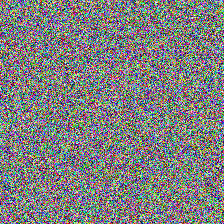

In [22]:
tensor_to_image(random_image_tensor)

In [23]:
### Zeros and Ones
zeros = torch.zeros(size=(224, 224, 3))

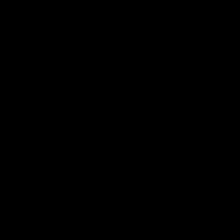

In [24]:
tensor_to_image(zeros)

In [25]:
ones = torch.ones (size=(224, 224, 3))

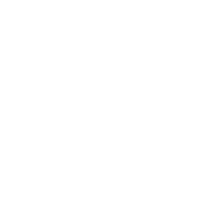

In [26]:
tensor_to_image(ones)

In [27]:
ones.dtype

torch.float32

 ### Cretaing a range of tensor and tensors-like

In [28]:
#Using torch.arange
random_values = torch.arange(start=0, end = 100 , step=5)

In [29]:
#Creating tensors like
ten_zeros = torch.zeros_like(input = random_values)
print(ten_zeros)

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


In [30]:
x= torch.arange(0, 100, 10)
x

tensor([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])

In [31]:
x.min()


tensor(0)

In [32]:
x.max()

tensor(90)

In [33]:
x.sum()

tensor(450)

In [34]:
x.dtype

torch.int64

In [35]:
x.mean(dtype = torch.float32)

tensor(45.)

In [36]:
x.dtype

torch.int64

In [37]:
x=x.type(torch.float32)

In [38]:
x.dtype

torch.float32

In [39]:
x

tensor([ 0., 10., 20., 30., 40., 50., 60., 70., 80., 90.])